# Mathematical Modeling of Single Tumor Growth

This notebook mathematically models single tumor growth process in a tissue microenvironment using the **Invasion Percolation algorithm**. The simulation models the tumor's expansion based on the resistance of the surrounding tissue voxels.

## Simulation Overview

The simulation proceeds as follows:

0.  **Libraries and Functions:**
    * Import required Python libraries
    * Write helper functions

1.  **Initialization:**
    *   A 2D grid representing the tissue is created with randomly assigned resistance values for each voxel.
    *   A tumor core is initialized at a central location in the grid.

2.  **Tumor Invasion:**
    *   The tumor grows by invading neighboring voxels.
    *   The algorithm prioritizes invasion into voxels with lower resistance.
    *   A priority queue is used to manage the potential invasion sites, always selecting the one with the minimum resistance.
    *   The simulation runs for a specified number of growth steps, representing a period of time (15 days).
    *   At each step, the voxel with the lowest resistance from the current tumor frontier is invaded.
    *   The newly invaded voxel's neighbors are added to the frontier if they are not already part of the tumor.

3. **Save Results:**
    * In order to save the location of cancerous voxels, the **csv library** is leveraged.
    * **Pandas library** is utilized to make sure that the cancerous voxels are saved correctly.

# 0. Libraries and Functions:
The cell below imports the necessary Python libraries for the simulation:
* *numpy* for numerical operations,
* *matplotlib.pyplot* for plotting,
* *random* for generating random numbers,
* *heapq* for implementing a priority queue.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import heapq

This code block defines two functions:

* *get_neighbors:* Takes coordinates x and y and the grid size, and returns a list of valid 8-connected neighbors within the grid boundaries.
* *plot_tumor_growth:* Takes the resistance grid, grid size, tumor mask, a title, and an optional color bar flag. It generates and displays a plot of the resistance grid with the tumor cells overlaid as black dots.


In [2]:
def get_neighbors(x, y, size):
    """Return 8-connected neighbor coordinates within bounds."""
    neighbors = []
    directions = [(-1,-1), (-1,0), (-1,1), (0,-1), (0,1), (1,-1), (1,0), (1,1)]

    for dx, dy in directions:
        nx, ny = x + dx, y + dy
        if 0 <= nx < size and 0 <= ny < size:
            neighbors.append((nx, ny))
    return neighbors

def plot_tumor_growth(info, grid_size, tumors, title, color_bar=True):
    plt.figure(figsize=(8, 8))  # Create a new figure for each plot
    plt.imshow(info, cmap='Wistia')
    plt.title(title)
    if color_bar:
        cbar = plt.colorbar(shrink=0.8)  # Make the colorbar 80% of its original height
        cbar.set_label('Resistance of Voxels', labelpad=10) # Increased labelpad for more space
        # Set colorbar ticks
        cbar.set_ticks(np.arange(0, 1.1, 0.1))

    y_coords, x_coords = np.where(tumors == 1)
    plt.scatter(x_coords, y_coords, color='black', marker='o', s=3)
    plt.xticks(np.arange(0, grid_size+1, 10))
    plt.yticks(np.arange(0, grid_size+1, 10))
    plt.gca().invert_yaxis()

    plt.show()

# 1. Initialization
This code block initializes the blank Tumor Microenvironment (TME). It sets the grid_size, creates an empty tumor_mask (a grid to track tumor cells), and generates a grid of random resistance values between 0 and 1. It then calls *plot_tumor_growth* function **to** display the initial resistance values.

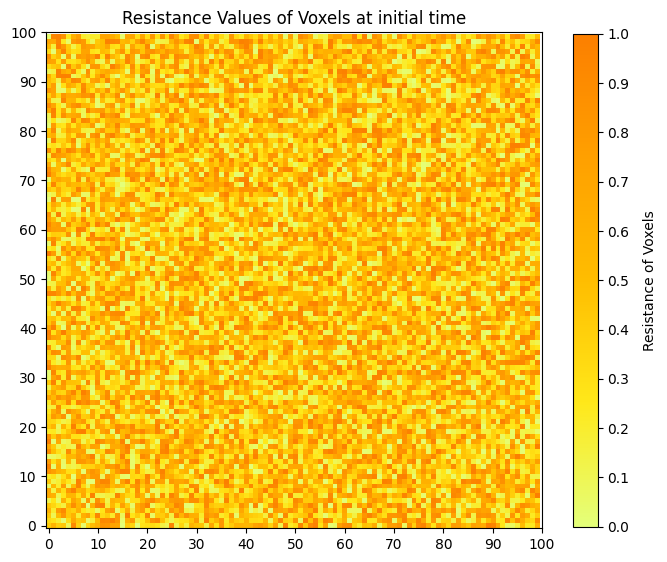

In [3]:
grid_size = 100              # 100 x 100 tissue voxels
tumor_mask = np.zeros((grid_size, grid_size), dtype=np.int32)
resistance = np.random.rand(grid_size, grid_size) # Create grid with random resistance values

plot_tumor_growth(resistance, grid_size, tumor_mask, title="Resistance Values of Voxels at initial time", color_bar=True)

This code block initializes the tumor growth simulation. It sets the starting coordinates (x, y) of the tumor core, marks this voxel in the tumor_mask, and initializes an empty frontier list (which will be used as a priority queue). It then adds all non-invaded neighbors of the tumor core to the frontier, prioritizing them by their resistance values. Finally, it plots the initial tumor core.

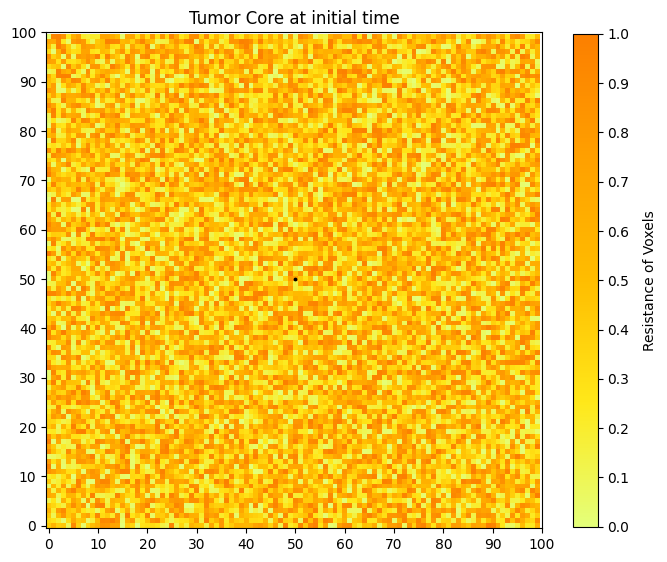

In [4]:
x, y = 50, 50
tumor_mask[x, y] = 1
frontier = []

# Add all non-invaded neighbors to frontier
for nx, ny in get_neighbors(x, y, grid_size):
    if tumor_mask[nx, ny] == 0:
        heapq.heappush(frontier, (resistance[nx, ny], (nx, ny)))
plot_tumor_growth(resistance, grid_size, tumor_mask, title="Tumor Core at initial time", color_bar=True)

# 2. Tumor Invasion
This code block implements the invasion percolation algorithm for tumor growth. It simulates tumor growth for a certain number of growth_steps (representing 15 days), which is aligned with the moderate logistic growth model. This model is represented at the end of this notebook for completeness.

In each step, the invasion percolation algorithm extracts the code block with the lowest resistance from the frontier, marks it as a tumorous voxel if it hasn't been invaded already, and adds its non-invaded neighbors to the frontier. It plots the tumor growth periodically (every 24 steps, representing a day) and also at the end of the simulation.

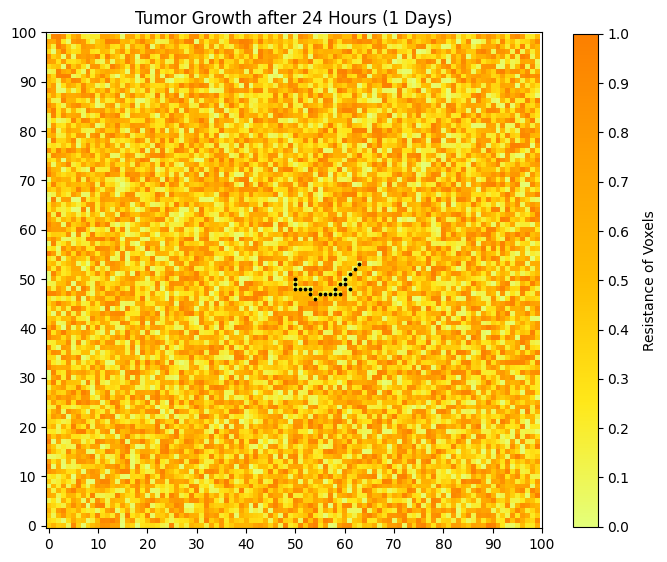

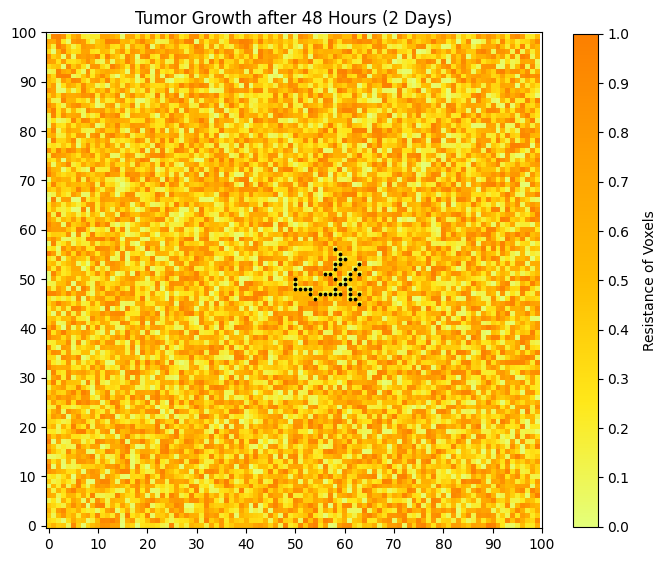

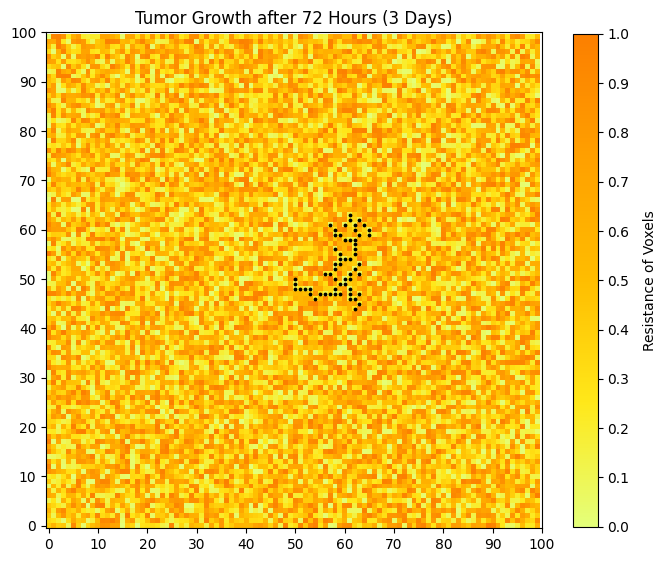

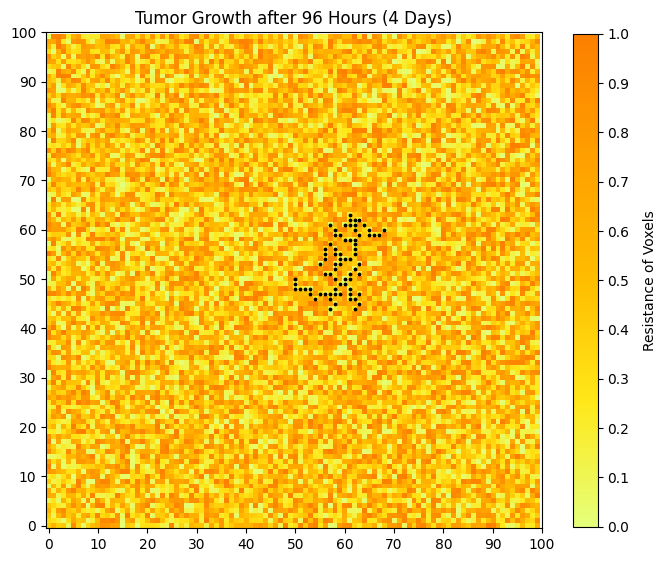

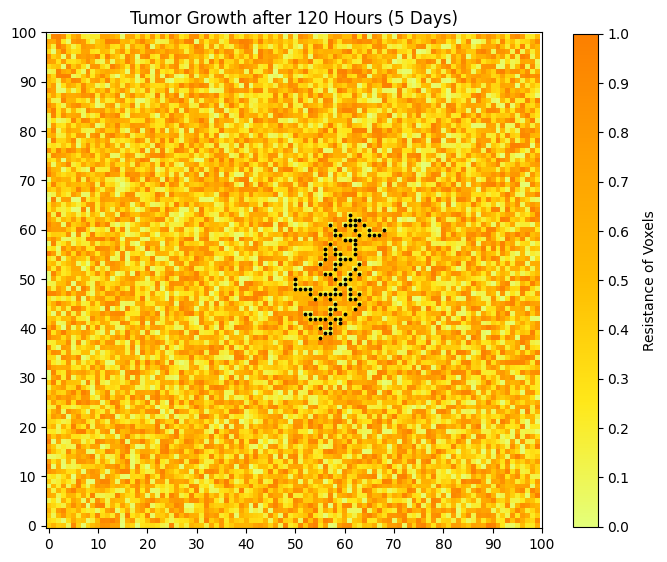

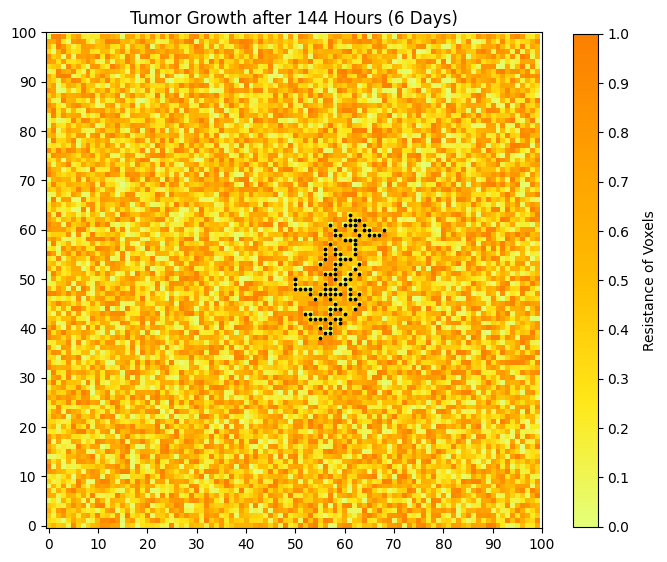

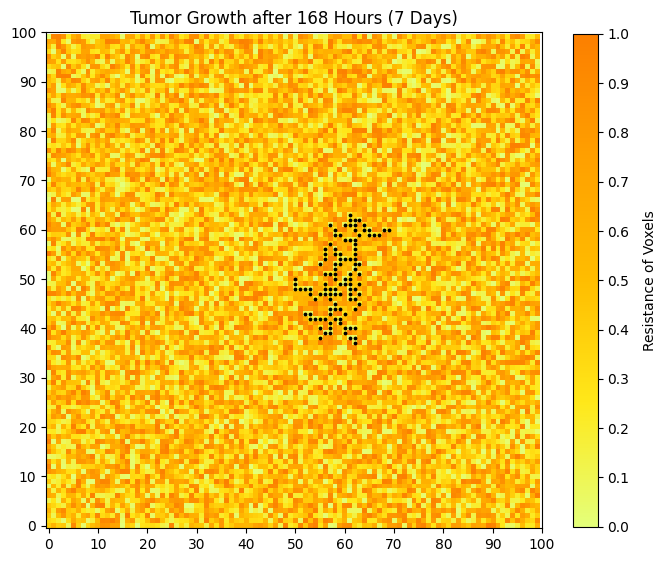

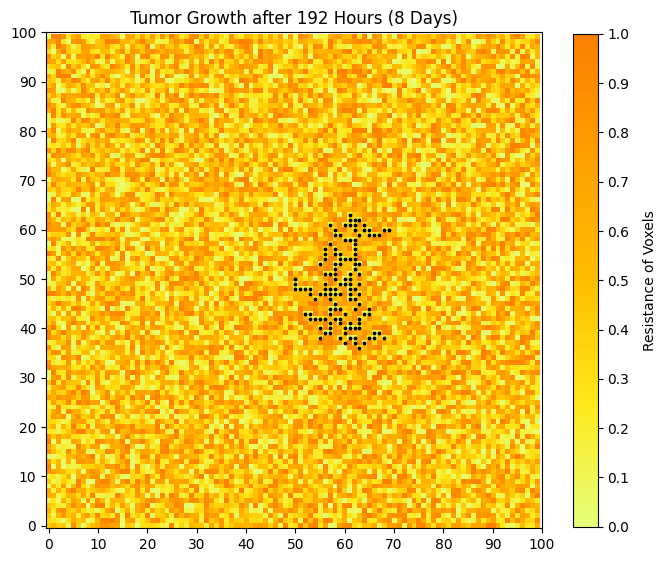

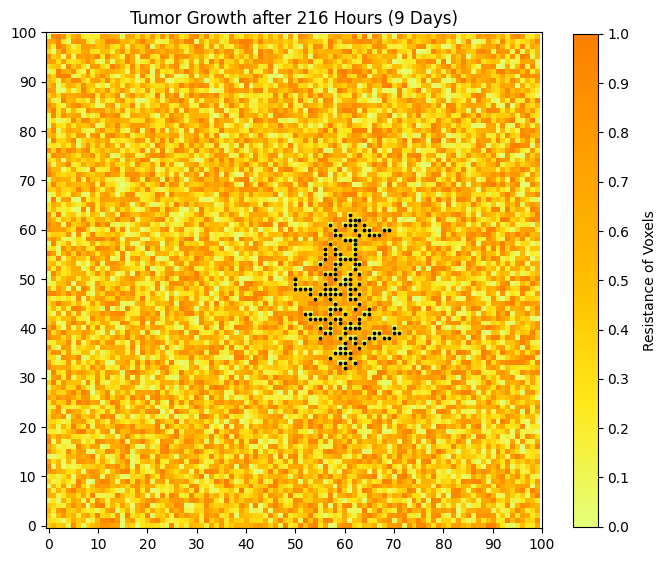

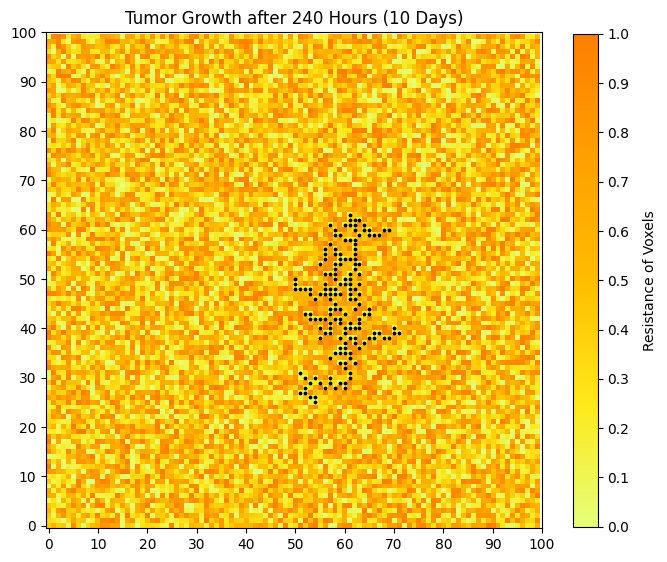

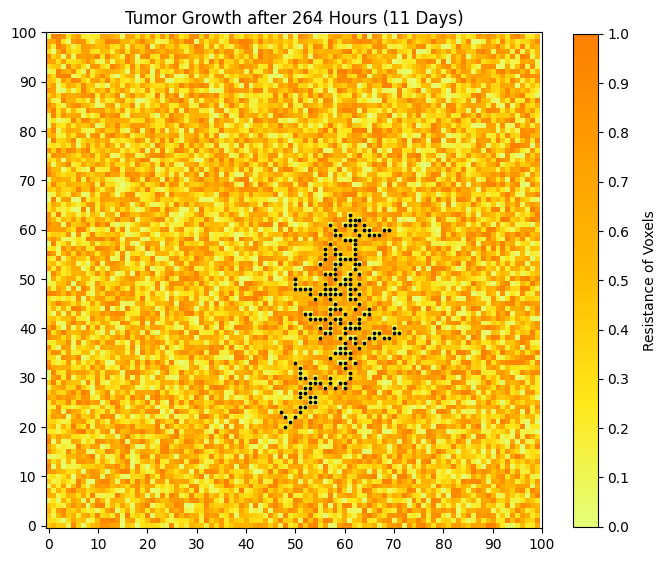

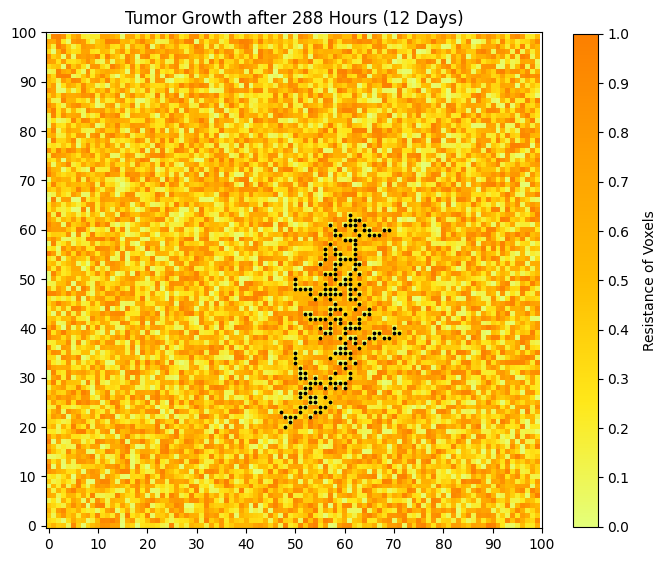

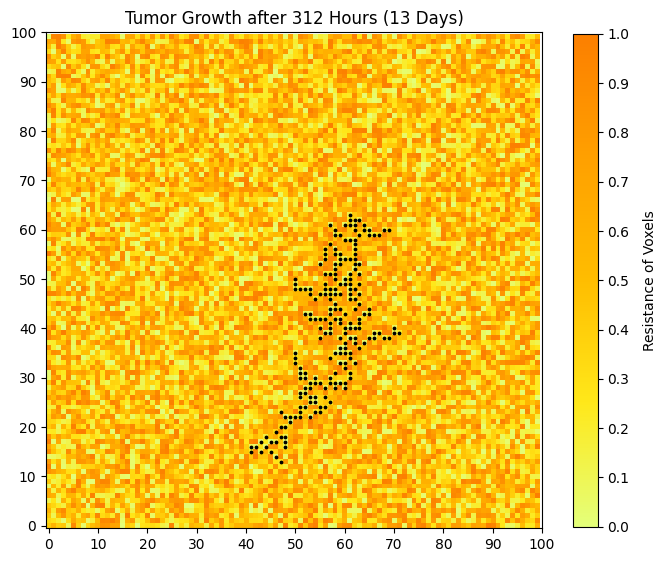

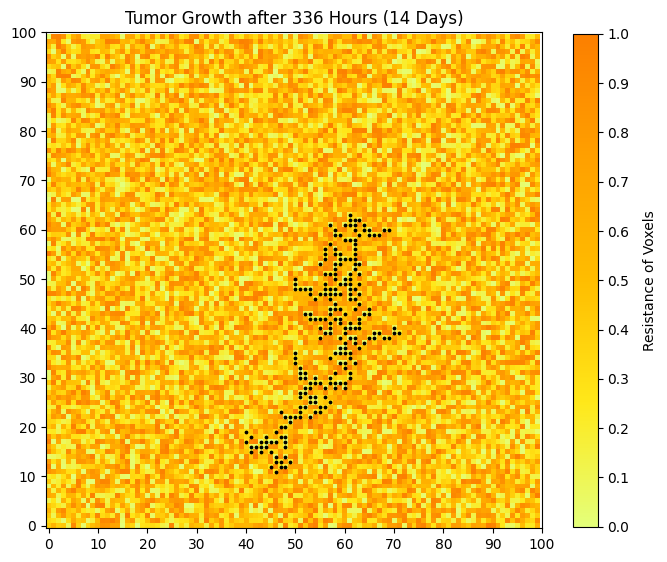

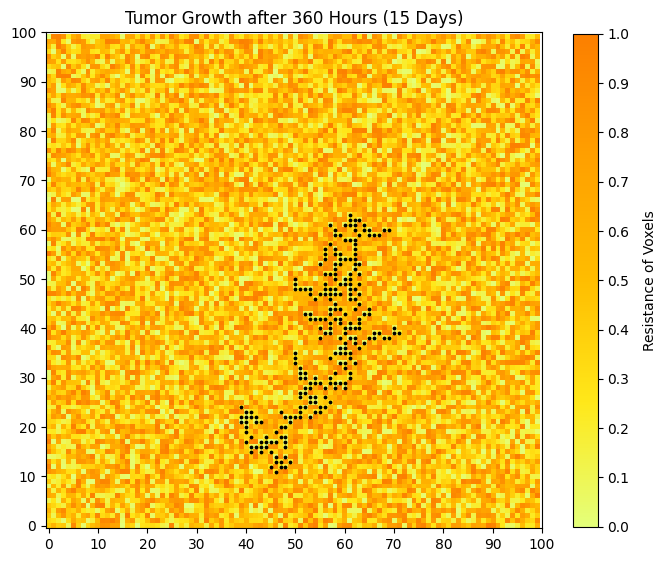

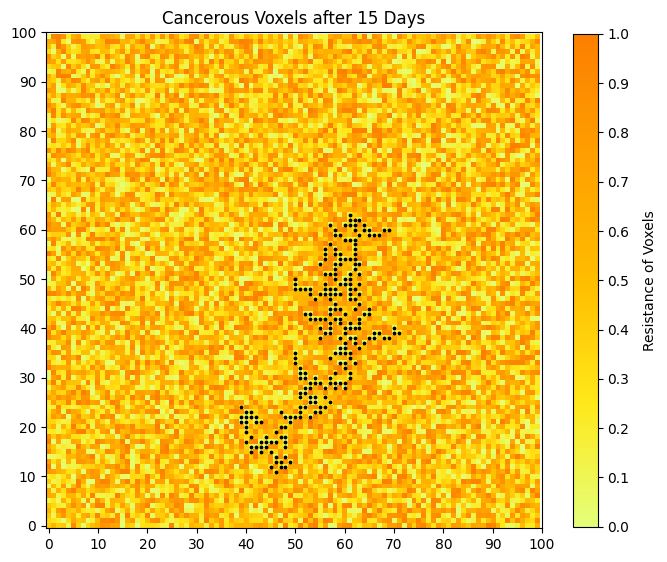

In [5]:
# Invasion percolation growth
step = 0
growth_steps = 360 # Representing 2 weeks (Each time step is 1 hour)
steps = []

while frontier and step < growth_steps:
    step += 1
    res, (x, y) = heapq.heappop(frontier)
    if tumor_mask[x, y] == 0:
        tumor_mask[x, y] = 1
        for nx, ny in get_neighbors(x, y, grid_size):
            if tumor_mask[nx, ny] == 0:
                heapq.heappush(frontier, (resistance[nx, ny], (nx, ny)))

    if step % 24 == 0:
        plot_tumor_growth(resistance, grid_size, tumor_mask, title=f"Tumor Growth after {step} Hours ({step//24} Days)", color_bar=True)

plot_tumor_growth(resistance, grid_size, tumor_mask, title=f"Cancerous Voxels after {step//24} Days", color_bar=True)

# 3. Save Results
For further analysis, the position of tumor voxels are saved into a *csv* file.

In [6]:
import csv

with open('tumor_voxels.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(tumor_mask)

To make sure that all the voxels are stored correctly, I loaded and showed them on the plot again.
I will use this code block in other notebooks whenever I want to initialize the TME containing a single tumor.

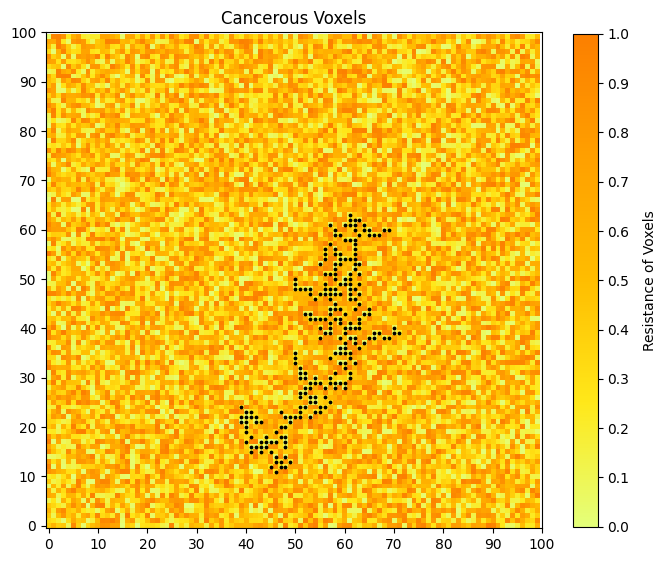

In [7]:
import pandas as pd

tumor_voxels = pd.read_csv("tumor_voxels.csv").to_numpy()
plot_tumor_growth(resistance, grid_size, tumor_mask, title=f"Cancerous Voxels", color_bar=True)

# Tumor Growth Model
For completeness, I explain the theoretical principles behind the number of voxels I simulated in this notebook.

To simulate the cancerous cell proliferation within an environment, there is a need for a biologically reasonable tumor growth model. Among lots of tumor growth models, such as exponential growth, exponential linear, power law, Gompertz, Richards, Von Bertalanffy, etc., I consider the logistic growth model, which is reliable, interpretable, descriptive for many types of tumors, supports biologically meaningful parameters, and computationally tractable. The logistic tumor growth model is developed by Edelstein-Keshet, which considers resource limitations, such as space, oxygen, and nutrients, to simulate a realistic tumor expansion. This model leverages the logistic equation introduced by Verhulst, which is written as

$$
\frac{dN}{dt} = rN \left( 1 - \frac{N}{K} \right)
$$

where $N$ represents the population size, $r$ denotes the growth rate, and $K$ refers to the carrying (maximum) capacity. Considering the logistic equation as the baseline, the logistic tumor growth can obtain the number of cancerous cells over time using

$$
N(t) = \frac{K}{1 + \left( \frac{K - N_0}{N_0} \right) e^{-rt}},
$$

where $N(t)$ and $N_0$ denote the number of cells at time $t$ and the initial number of cells within the environment, respectively. Carrying capacity $K$ refers to the maximum number of cells that the environment can fit. Furthermore, the intrinsic growth rate of the cancerous cells is shown by $r$.

The tumor's growth rate $r$ in the equation above depends on various factors such as tumor type, experimental setting (in vitro, in vivo, or in silico), cell line proliferation rate, etc. For instance, we can compute this rate according to the typical doubling times of cancer proliferation cells per 1 to 3 days using the relationship below

$$
r = \frac{\ln 2}{T_d}.
$$

where $T_d$ denotes the doubling time, which means the total number of cancerous cells doubles every $T_d$ days. Therefore, the growth rates for different values of typical doubling times $T_{d1} = 1$, $T_{d2} = 2$, and $T_{d3} = 3$ per hour can be obtained as $r_1 = 0.0289$, $r_2 = 0.0144$, $r_3 = 0.0096$, respectively.

The code block below shows the number of cancerous cells over three days with three different growth rates.

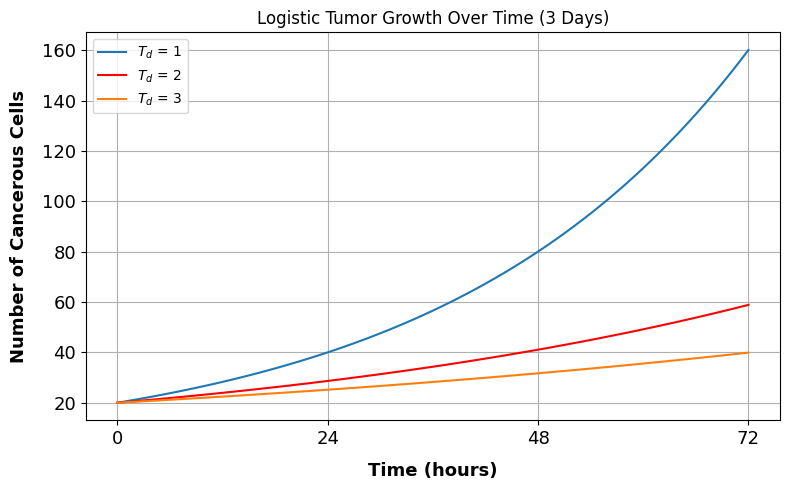

In [8]:
from math import exp

# Parameters
K = 318000   # Carrying capacity (cells)
N0 = 20      # Initial number of cancerous cells
r1 = 0.0289  # Growth rate per hour
r2 = 0.015   # Growth rate per hour
r3 = 0.0096  # Growth rate per hour
steps = 72  # Each step considered as one hour
hours = np.arange(0, steps+1, 1)  # 0 to steps hours

# Logistic growth function
def logistic_growth(t, N0, K, r):
    return K / (1 + ((K - N0) / N0) * np.exp(-r * t))

# Compute N(t) over time
N_t_1 = [logistic_growth(t, N0, K, r1) for t in hours]
N_t_2 = [logistic_growth(t, N0, K, r2) for t in hours]
N_t_3 = [logistic_growth(t, N0, K, r3) for t in hours]

# Create DataFrame
df = pd.DataFrame({
    'Hour': hours,
    'Cancerous Cells 1': N_t_1,
    'Cancerous Cells 2': N_t_2,
    'Cancerous Cells 3': N_t_3
})


plt.figure(figsize=(8, 5))
plt.plot(hours, N_t_1, label='$T_d$ = 1')
plt.plot(hours, N_t_2, label='$T_d$ = 2', color='red')
plt.plot(hours, N_t_3, label='$T_d$ = 3')
plt.title(f"Logistic Tumor Growth Over Time ({steps//24} Days)")
plt.xlabel('Time (hours)', fontsize=13, fontweight='bold', labelpad=10)
plt.ylabel('Number of Cancerous Cells', fontsize=13, fontweight='bold', labelpad=10)
plt.tick_params(axis='both', which='major', labelsize=13) # You can adjust the labelsize value

plt.grid(True)
plt.legend()
plt.xticks(np.arange(min(hours), max(hours)+1, 24)) # Set xticks every 24 units
plt.tight_layout()
plt.show()


The code block below shows the number of cancerous cells over 17 days (408 hours) with the moderate growth rate. For more clarification, the exact number of cancerous cells after passing 15 days (360 hours) is projected on the curve with a black dashed line.

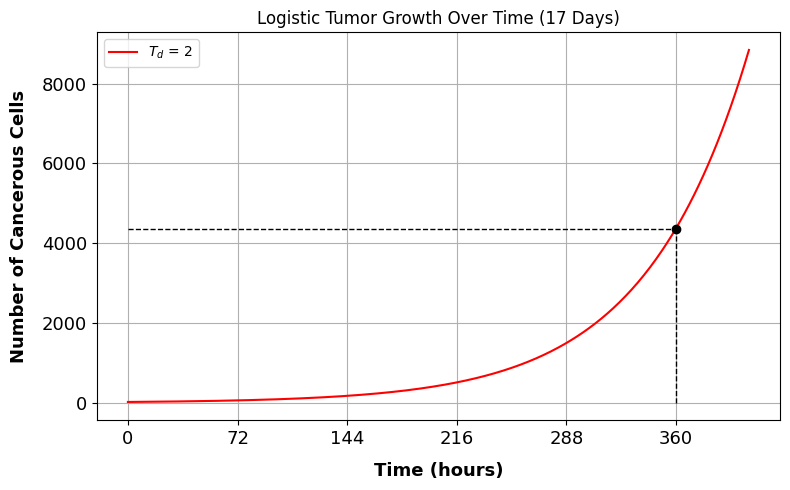

In [9]:
# Parameters
K = 318000   # Carrying capacity (cells)
N0 = 20      # Initial number of cancerous cells
r1 = 0.0289  # Growth rate per hour
r2 = 0.015   # Growth rate per hour
r3 = 0.0096  # Growth rate per hour
steps = 408  # Each step considered as one hour
hours = np.arange(0, steps+1, 1)  # 0 to steps hours

# Logistic growth function
def logistic_growth(t, N0, K, r):
    return K / (1 + ((K - N0) / N0) * np.exp(-r * t))

# Compute N(t) over time
N_t_1 = [logistic_growth(t, N0, K, r1) for t in hours]
N_t_2 = [logistic_growth(t, N0, K, r2) for t in hours]
N_t_3 = [logistic_growth(t, N0, K, r3) for t in hours]

# Create DataFrame
df = pd.DataFrame({
    'Hour': hours,
    'Cancerous Cells 1': N_t_1,
    'Cancerous Cells 2': N_t_2,
    'Cancerous Cells 3': N_t_3
})

plt.figure(figsize=(8, 5))
plt.plot(hours, N_t_2, label='$T_d$ = 2', color='red')
plt.title(f"Logistic Tumor Growth Over Time ({steps//24} Days)")
plt.xlabel('Time (hours)', fontsize=13, fontweight='bold', labelpad=10)
plt.ylabel('Number of Cancerous Cells', fontsize=13, fontweight='bold', labelpad=10)
plt.tick_params(axis='both', which='major', labelsize=13) # You can adjust the labelsize value

# Add dashed lines for x=360 and corresponding y value
x_value = 360
y_value = logistic_growth(x_value, N0, K, r2)
plt.plot([x_value, x_value], [0, y_value], 'k--', lw=1)  # Vertical dashed line
plt.plot([0, x_value], [y_value, y_value], 'k--', lw=1)  # Horizontal dashed line
plt.plot(x_value, y_value, 'ko') # Mark the point with a circle


plt.grid(True)
plt.legend()
plt.xticks(np.arange(min(hours), max(hours)+1, 72)) # Set xticks every 24 units
plt.tight_layout()
plt.show()